# Japan Used Cars Price Prediction

## LinearRegression Model

In [34]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('Japan_used_cars_datasets.csv')
df.head(5)

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


## PreProcessing

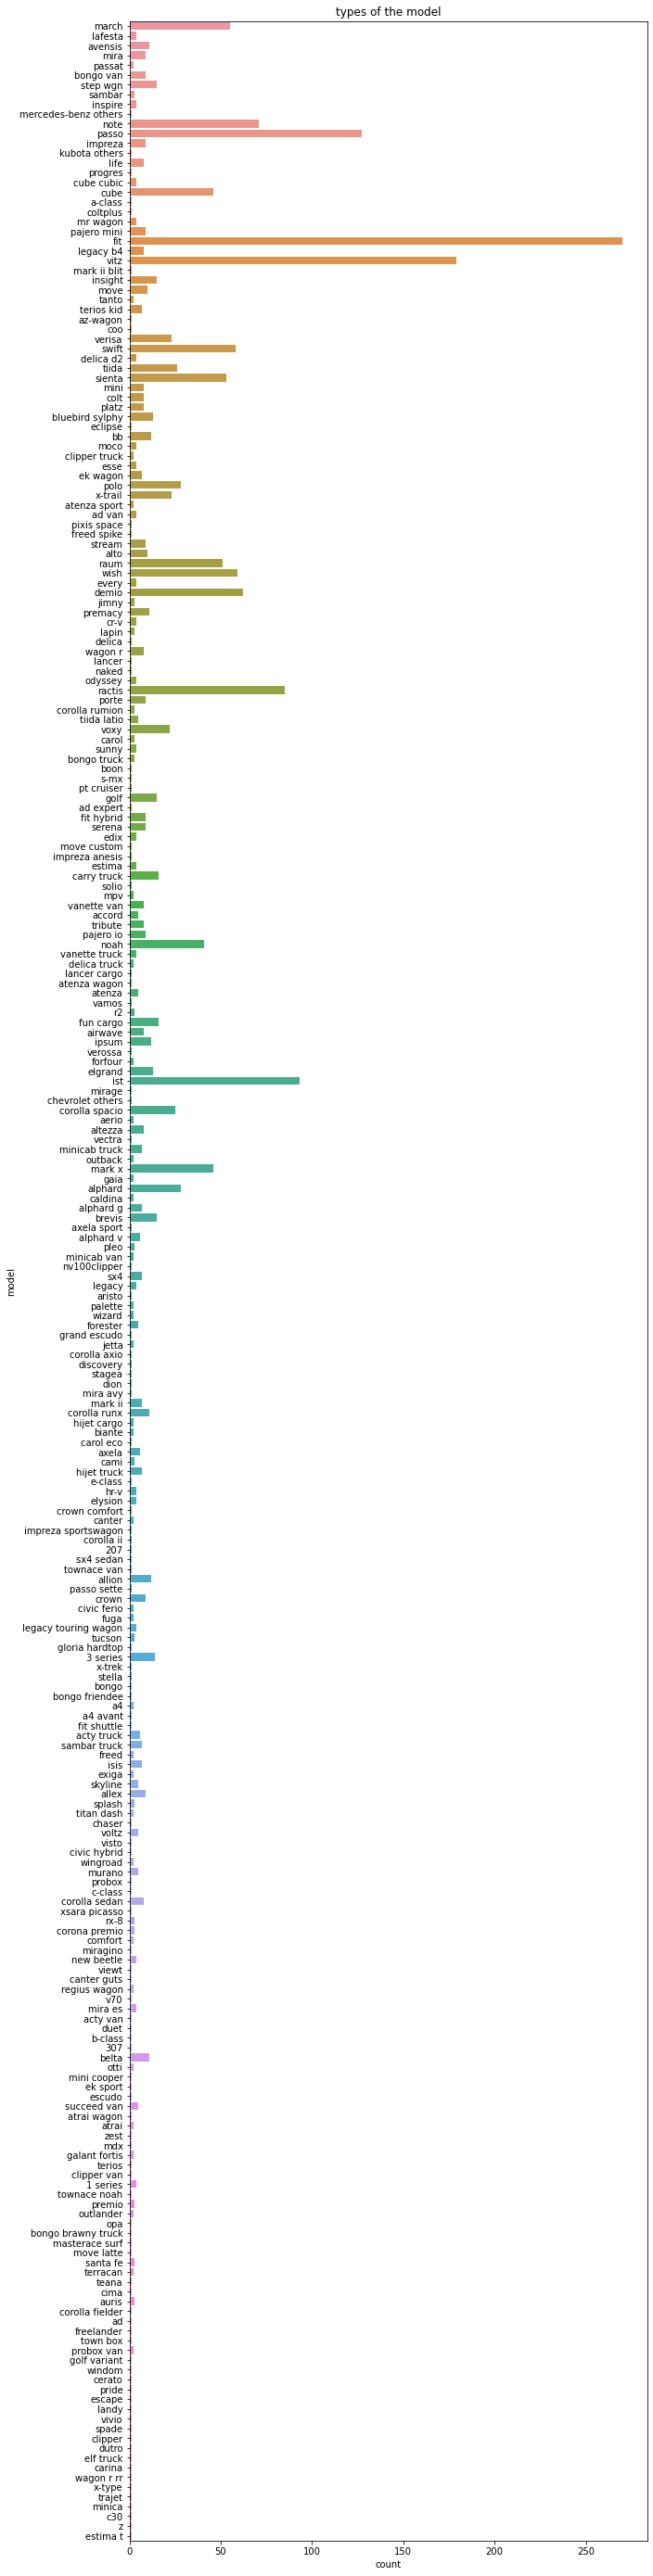

In [36]:
# Seeing which car sold most
plt.figure(figsize=(10,50))
sns.countplot(y='model' , data=df)
plt.title('types of the model')
plt.show()

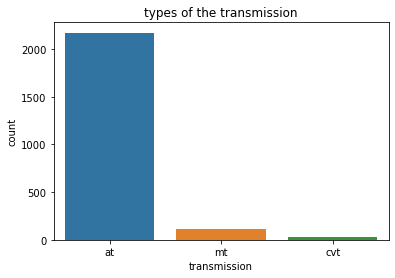

In [37]:
#Seeing which transmission car sold most
sns.countplot(x='transmission' , data=df)
plt.title('types of the transmission')
plt.show()

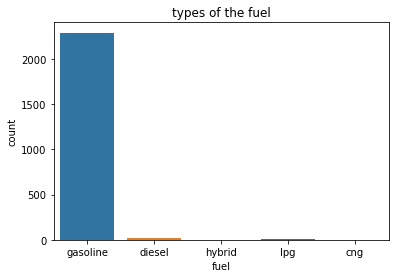

In [38]:
# seeing which fuel car people pefre most
sns.countplot(x='fuel' , data=df)
plt.title('types of the fuel')
plt.show()

In [39]:
# value counts 
print(df['model'].value_counts())
print('\n\n')
print(df['fuel'].value_counts())
print('\n\n')
print(df['transmission'].value_counts())
print('\n\n')
print(df['drive'].value_counts())
print('\n\n')
print(df['hand_drive'].value_counts())
print('\n\n')

fit                    270
vitz                   179
passo                  127
ist                     93
ractis                  85
                      ... 
sx4 sedan                1
207                      1
corolla ii               1
impreza sportswagon      1
estima t                 1
Name: model, Length: 258, dtype: int64



gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64



at     2171
mt      117
cvt      30
Name: transmission, dtype: int64



2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64



rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64





<AxesSubplot:xlabel='transmission', ylabel='price'>

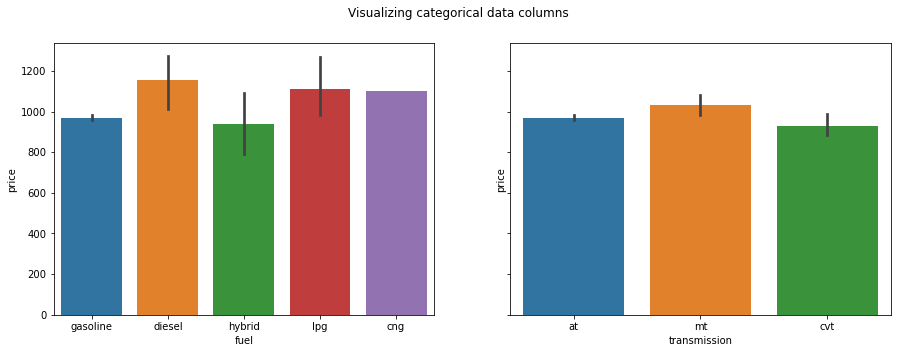

In [40]:
#Visualizing categorical data columns
fuel=df['fuel']
trans=df['transmission']
price=df['price']
fig,axes=plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=fuel , y=price , ax=axes[0])
sns.barplot(x=trans, y=price , ax=axes[1])

In [41]:
# Replacing the values or doing label encoding manually
df.replace({'transmission':{'mt':0,'at':1,'cvt':2}},inplace=True)
df.replace({'fuel':{'gasoline':0,'diesel':1,'hybrid':2,'lpg':3,'cng':4}},inplace=True)
df.replace({'drive':{'2wd':0,'4wd':1,'awd':2}},inplace=True)
df.replace({'hand_drive':{'rhd':0,'lhd':1,'center':2}},inplace=True)

In [42]:
# checking datatypes after replacing
df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission        int64
drive               int64
hand_drive          int64
fuel                int64
dtype: object

In [43]:
# using Label Encoder for mark and model column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [44]:
df1=lab_enc.fit_transform(df['mark'])
pd.Series(df1)

0       19
1       19
2       19
3       25
4        4
        ..
2313    25
2314    25
2315    23
2316     8
2317    25
Length: 2318, dtype: int32

In [45]:
df['mark']=df1
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,19,march,2003,80000,1240,1,0,0,0
1,1,110,19,march,2010,53000,1200,1,0,0,0
2,2,165,19,lafesta,2005,47690,2000,1,0,0,0
3,3,190,25,avensis,2008,130661,1990,1,0,0,0
4,4,190,4,mira,2006,66300,660,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,25,vitz,2009,121000,996,1,0,0,0
2314,2332,1400,25,estima,2003,101000,3000,1,0,0,0
2315,2333,1400,23,r2,2005,101000,660,2,0,0,0
2316,2334,1400,8,z,2000,170000,660,1,1,0,0


In [46]:
df2=lab_enc.fit_transform(df['model'])
pd.Series(df2)

0       143
1       143
2       134
3        29
4       155
       ... 
2313    242
2314    100
2315    195
2316    256
2317    101
Length: 2318, dtype: int32

In [47]:
df['model']=df2
df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,19,143,2003,80000,1240,1,0,0,0
1,1,110,19,143,2010,53000,1200,1,0,0,0
2,2,165,19,134,2005,47690,2000,1,0,0,0
3,3,190,25,29,2008,130661,1990,1,0,0,0
4,4,190,4,155,2006,66300,660,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,25,242,2009,121000,996,1,0,0,0
2314,2332,1400,25,100,2003,101000,3000,1,0,0,0
2315,2333,1400,23,195,2005,101000,660,2,0,0,0
2316,2334,1400,8,256,2000,170000,660,1,1,0,0


In [48]:
# checking all null values and datatypes after transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2318 non-null   int64
 1   price            2318 non-null   int64
 2   mark             2318 non-null   int32
 3   model            2318 non-null   int32
 4   year             2318 non-null   int64
 5   mileage          2318 non-null   int64
 6   engine_capacity  2318 non-null   int64
 7   transmission     2318 non-null   int64
 8   drive            2318 non-null   int64
 9   hand_drive       2318 non-null   int64
 10  fuel             2318 non-null   int64
dtypes: int32(2), int64(9)
memory usage: 181.2 KB


In [49]:
df.describe()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,19.411993,147.894305,2005.972390,100013.194996,1507.010785,0.962468,0.087144,0.007765,0.020276
std,674.460724,288.673112,7.132919,68.563361,3.698863,52512.478883,549.585170,0.249068,0.289655,0.092583,0.211910
min,0.000000,80.000000,0.000000,0.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,583.250000,776.000000,15.000000,104.000000,2004.000000,67000.000000,1300.000000,1.000000,0.000000,0.000000,0.000000
50%,1168.500000,1000.000000,24.000000,146.000000,2006.000000,94000.000000,1490.000000,1.000000,0.000000,0.000000,0.000000
75%,1753.750000,1213.000000,25.000000,204.000000,2009.000000,124000.000000,1800.000000,1.000000,0.000000,0.000000,0.000000
max,2335.000000,1400.000000,27.000000,257.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


In [1]:
# Observations 
# 1] There is no null values
# 2] There is problem in min and max of mileage and engine capacity
# 3] data has huge amount of std

## EDA and visualization

In [50]:
corr=df.corr()
corr.shape

(11, 11)

### Plotting Heatmap to see co-relation 

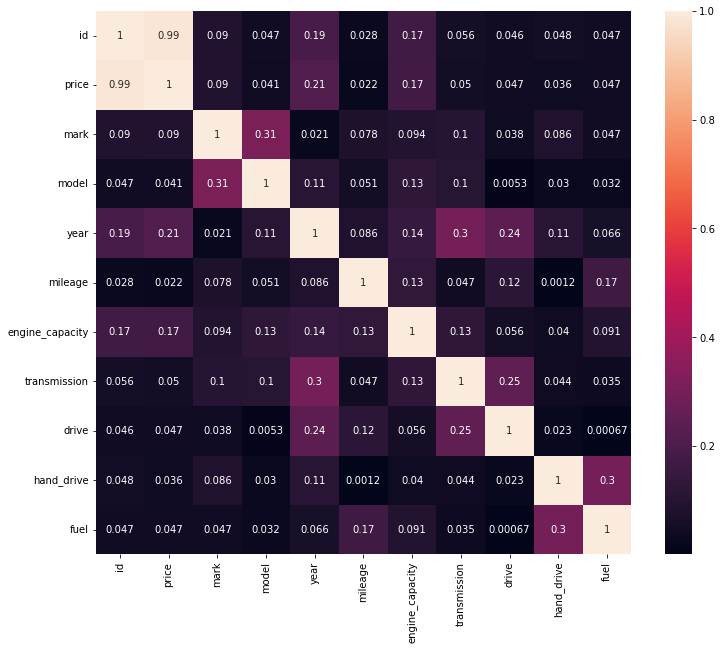

In [51]:
corr=df.corr().abs()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

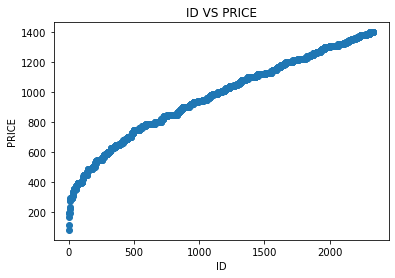

In [52]:
plt.scatter(df.id,df.price)
plt.xlabel('ID')
plt.ylabel('PRICE')
plt.title('ID VS PRICE')
plt.show()

### Plotting Disrtibution plot to see how data is distributed

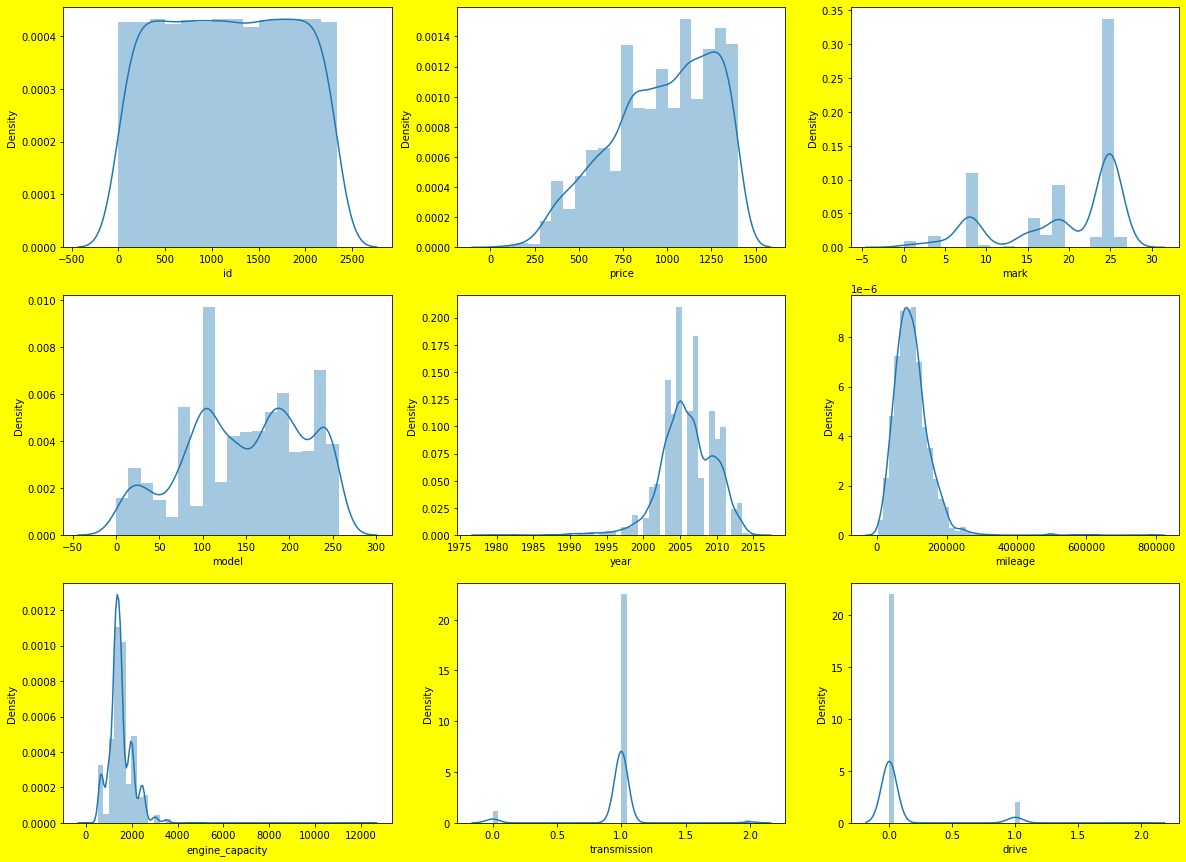

In [53]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

In [54]:
df.corr()['price'].sort_values()

year              -0.211092
transmission      -0.050396
model             -0.041376
mileage            0.021581
hand_drive         0.036473
fuel               0.046505
drive              0.046591
mark               0.090245
engine_capacity    0.173748
id                 0.985100
price              1.000000
Name: price, dtype: float64

### Plotting Scatter plot to see relation between feature and label

In [55]:
X = df.drop(['price'],axis = 1)
y = df['price']

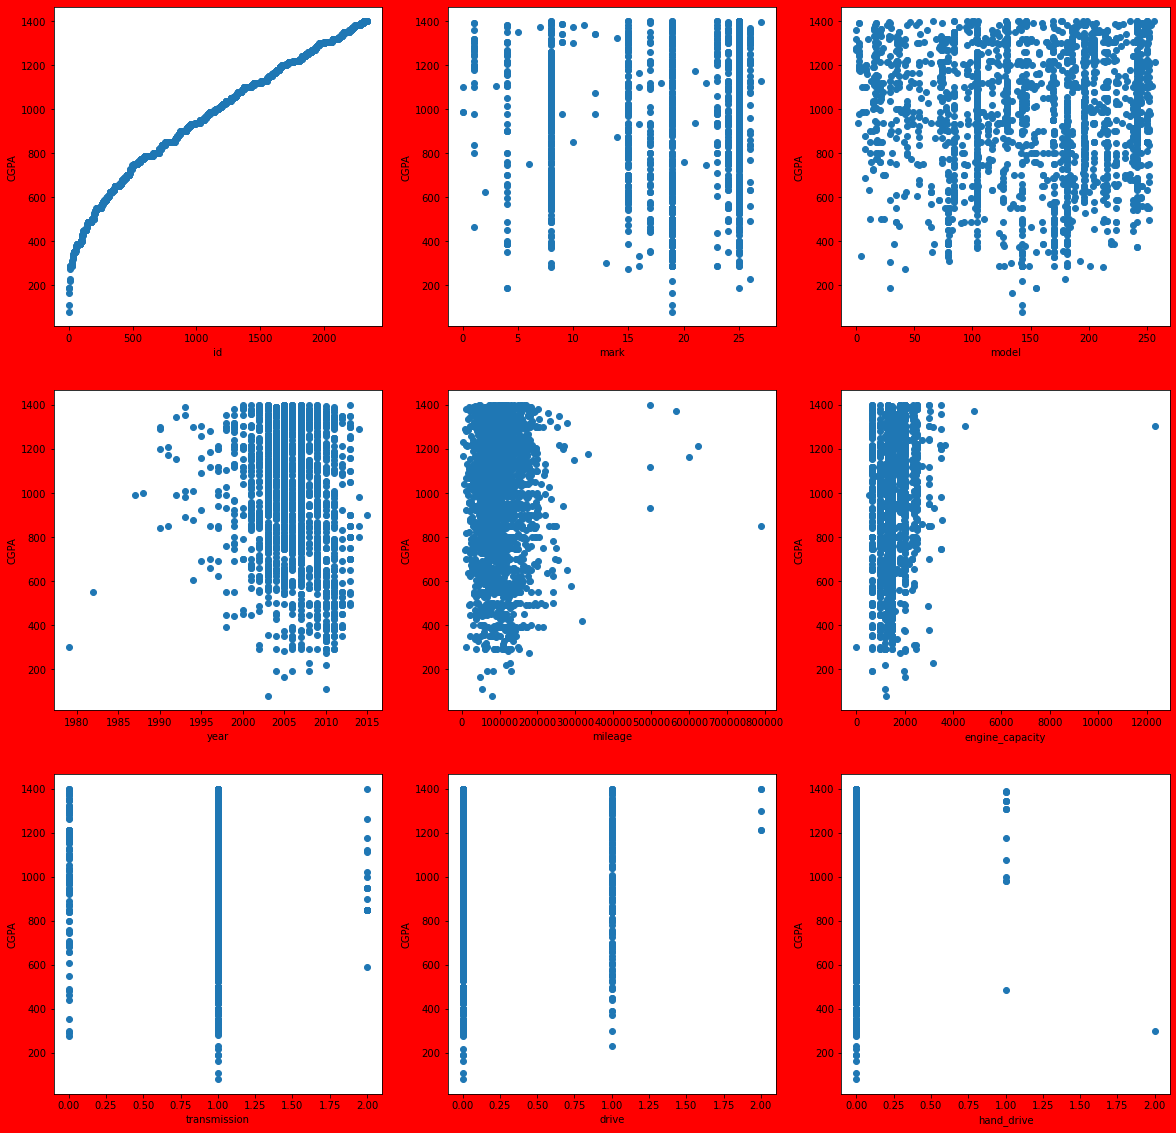

In [56]:
# so find relationship between feature(X) and label(y) by visulization using scatter plot

plt.figure(figsize = (20,20) , facecolor = 'red')
plotnumber = 1

for column in X:   #here feature is new X so X
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        plt.scatter(X[column] , y)
        plt.xlabel(column , fontsize = 10)
        plt.ylabel('CGPA' , fontsize = 10)
    plotnumber += 1
plt.show()

### plotting Boxplot to see any outliers

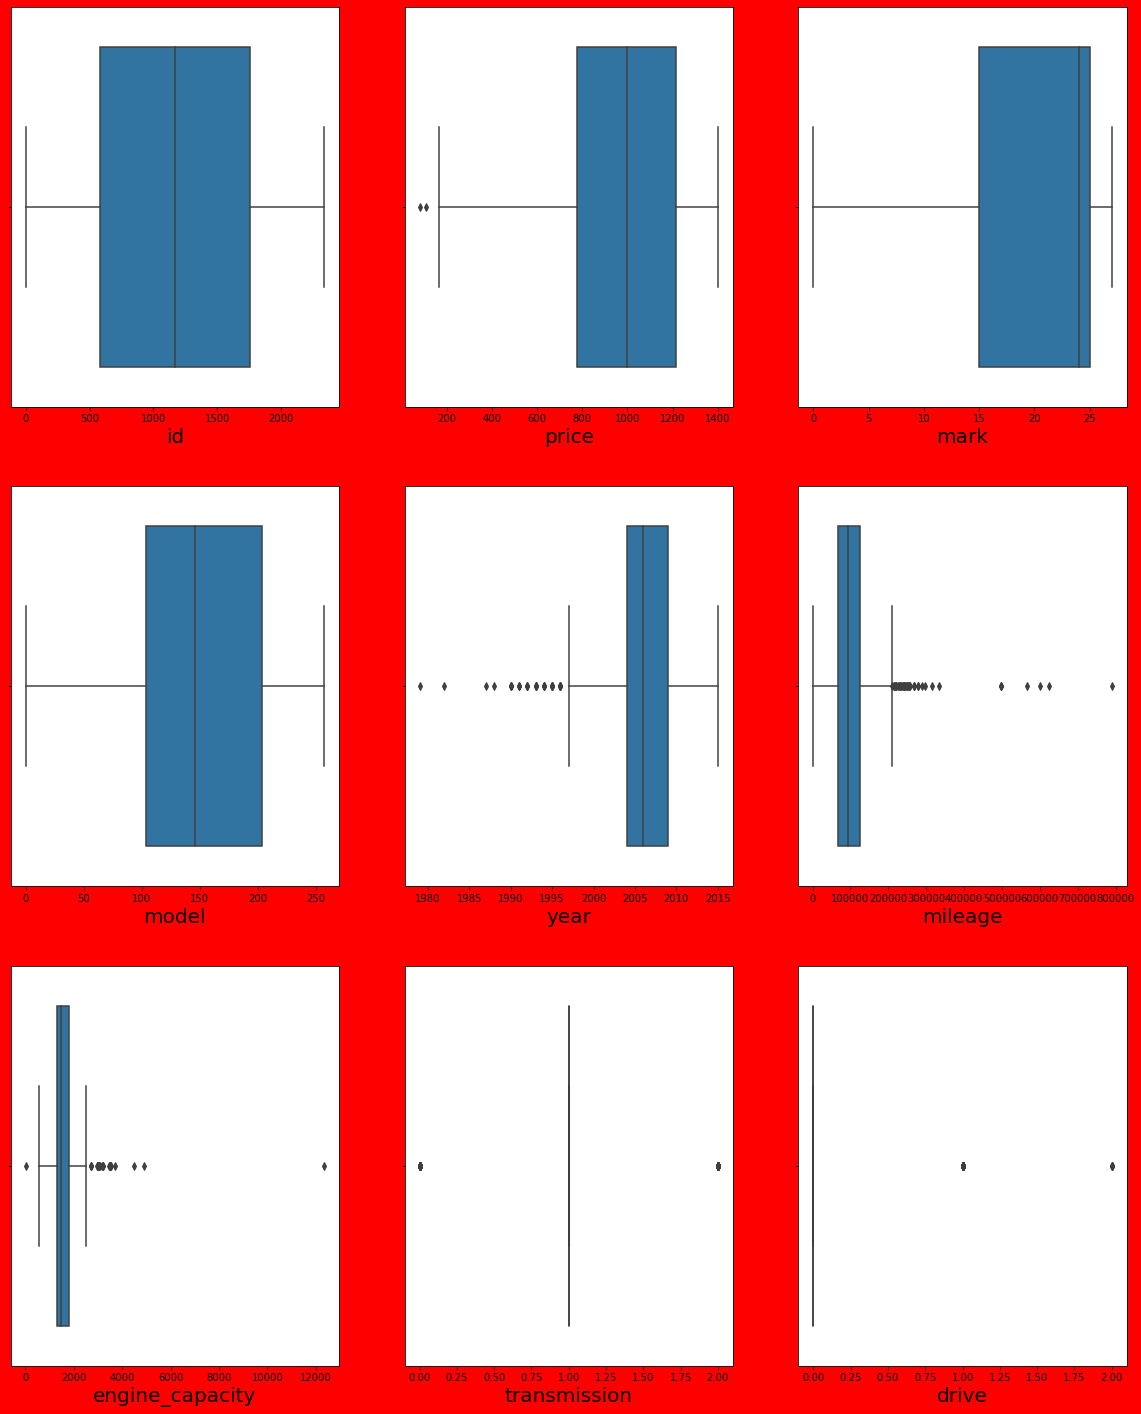

In [57]:
plt.figure(figsize=(20,25) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 9:
        plt.subplot (3,3,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

In [58]:
#skewness in terms of number
X.skew().sort_values(ascending=False)

hand_drive         12.811470
fuel               12.739754
engine_capacity     4.038892
drive               3.193137
mileage             3.089142
id                 -0.002276
model              -0.267060
year               -0.845917
mark               -0.947938
transmission       -1.976396
dtype: float64

In [62]:
#applying Power Transformation beacuse our dataset is small and we want to keep outlier
from sklearn.preprocessing import power_transform , PowerTransformer
pt=PowerTransformer()

In [63]:
#transformed data
X_scaled=pt.fit_transform(X)
X_scaled

array([[-2.1813481 , -0.28248013, -0.06488162, ..., -0.30476338,
        -0.08595401, -0.1105761 ],
       [-2.17165888, -0.28248013, -0.06488162, ..., -0.30476338,
        -0.08595401, -0.1105761 ],
       [-2.16334367, -0.28248013, -0.19581398, ..., -0.30476338,
        -0.08595401, -0.1105761 ],
       ...,
       [ 1.55134925,  0.43802033,  0.68825428, ..., -0.30476338,
        -0.08595401, -0.1105761 ],
       [ 1.55248897, -1.56820146,  1.56591757, ...,  3.2812333 ,
        -0.08595401, -0.1105761 ],
       [ 1.55362856,  0.84945607, -0.67773691, ..., -0.30476338,
        -0.08595401, -0.1105761 ]])

In [64]:
#again checking the skewness
pd.DataFrame(X_scaled,columns=X.columns).skew().sort_values(ascending=False)

hand_drive         11.555653
fuel                8.938755
drive               2.978398
transmission        1.253927
engine_capacity     0.154166
mileage             0.101598
id                 -0.288696
model              -0.289475
year               -0.363723
mark               -0.621261
dtype: float64

In [65]:
#we will convert numpy array into dataframe
X_new=pd.DataFrame(X_scaled,columns=X.columns)

In [66]:
X_new.skew().sort_values(ascending=False)

hand_drive         11.555653
fuel                8.938755
drive               2.978398
transmission        1.253927
engine_capacity     0.154166
mileage             0.101598
id                 -0.288696
model              -0.289475
year               -0.363723
mark               -0.621261
dtype: float64

### seeing distribution after treating Skewness

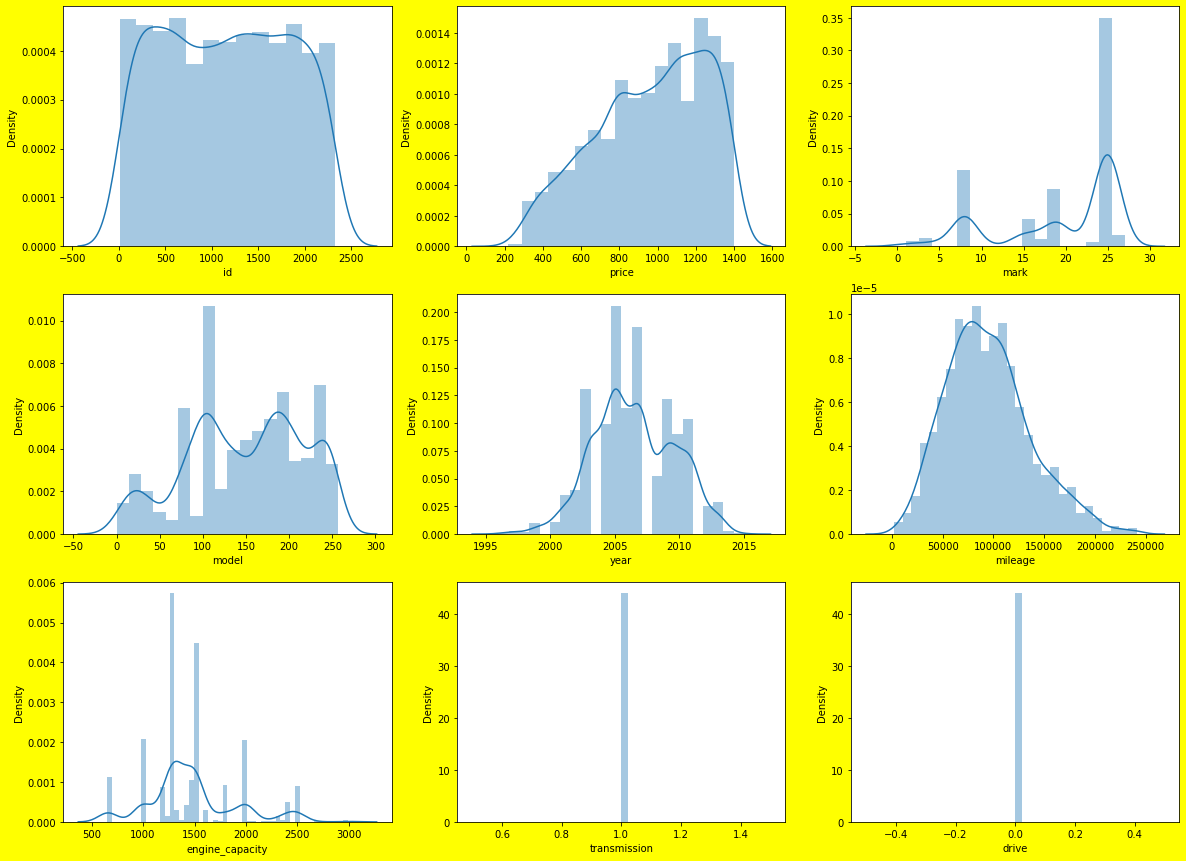

In [67]:
# now lets see how data is distributed for every column 

plt.figure(figsize=(20,15) , facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot (df[column])
        plt.xlabel(column , fontsize=10)
        
    plotnumber += 1
plt.show()

## removing Outlier by IQR Method

In [70]:
# FINDING THE IQR (inter quantile range) TO IDENTIFY OUTLIERS

#1ST QUNATILE
q1 = df.quantile(0.25)
q1

#2nd quantile
q3 = df.quantile(0.75)
q3

#IQR
iqr = q3 - q1
iqr

id                  1179.0
price                443.0
mark                  10.0
model                 93.0
year                   5.0
mileage            54075.5
engine_capacity      200.0
transmission           0.0
drive                  0.0
hand_drive             0.0
fuel                   0.0
dtype: float64

In [71]:
#validating outlier 
preg_high = (q3.mileage + (1.5*iqr.mileage))
preg_high

200188.75

In [73]:
# to check how many outliers in preg column 
outlier_high = np.where(df['mileage']>preg_high)
outlier_high

(array([  73,   76,  164,  166,  217,  288,  311,  317,  383,  450,  511,
         610,  700,  767,  782,  956, 1022, 1127, 1176, 1682, 1780, 1799,
        1855, 1908], dtype=int64),)

In [74]:
#drop the index which we find in above cell
df=df.drop(df.index[outlier_high])
df.shape

(1927, 11)

In [75]:
#once you delete you should reset index
df.reset_index()

,index,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,6,8,220,19,143,2010,117000,1200,1,0,0,0
1,9,11,283,8,212,2005,121655,2000,1,0,0,0
2,11,13,290,8,127,2002,61000,2490,1,0,0,0
3,12,14,290,16,149,2006,86000,2030,1,0,0,0
4,13,15,290,19,143,2011,62000,1200,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1922,2304,2322,1400,25,146,2007,87456,2500,1,0,0,0
1923,2309,2327,1400,15,84,2009,111670,1300,1,0,0,0
1924,2311,2329,1400,25,250,2005,101874,2000,1,0,0,0
1925,2312,2330,1400,15,84,2007,112000,1300,1,0,0,0


In [76]:
#validating outlier 
preg_highh = (q3.engine_capacity + (1.5*iqr.engine_capacity))
preg_highh

1800.0

In [77]:
# to check how many outliers in preg column 
outlier_highh = np.where(df['engine_capacity']>preg_highh)
outlier_highh

(array([   1,    2,    3,   16,   17,   46,   48,  120,  144,  154,  184,
         217,  227,  241,  250,  254,  261,  263,  284,  287,  323,  330,
         332,  334,  336,  341,  342,  375,  383,  384,  385,  387,  399,
         400,  401,  406,  419,  422,  431,  464,  466,  467,  472,  481,
         482,  485,  552,  568,  569,  581,  586,  587,  607,  612,  619,
         627,  631,  633,  635,  641,  646,  649,  662,  681,  685,  697,
         711,  712,  716,  726,  734,  741,  749,  765,  768,  769,  770,
         781,  791,  800,  806,  808,  809,  822,  840,  846,  847,  856,
         858,  870,  872,  874,  875,  878,  879,  882,  885,  886,  890,
         894,  897,  906,  910,  913,  916,  918,  926,  927,  928,  941,
         943,  945,  956,  961,  962,  963,  964,  968,  971,  972,  976,
         988,  989,  995, 1005, 1007, 1008, 1025, 1027, 1041, 1042, 1043,
        1046, 1047, 1049, 1061, 1065, 1079, 1081, 1083, 1084, 1090, 1107,
        1108, 1111, 1112, 1114, 1122, 

In [78]:
#drop the index which we find in above cell
df=df.drop(df.index[outlier_highh])
df.shape

(1586, 11)

In [79]:
#once you delete you should reset index
df.reset_index()

,index,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,6,8,220,19,143,2010,117000,1200,1,0,0,0
1,13,15,290,19,143,2011,62000,1200,1,0,0,0
2,14,16,290,19,143,2010,38000,1200,1,0,0,0
3,15,17,290,19,143,2011,130000,1200,1,0,0,0
4,16,18,290,19,143,2011,113000,1200,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1581,2300,2318,1400,25,250,2007,96755,1800,1,0,0,0
1582,2301,2319,1400,15,199,2006,98299,1300,1,0,0,0
1583,2309,2327,1400,15,84,2009,111670,1300,1,0,0,0
1584,2312,2330,1400,15,84,2007,112000,1300,1,0,0,0


### Observing outlier after treating Outliers

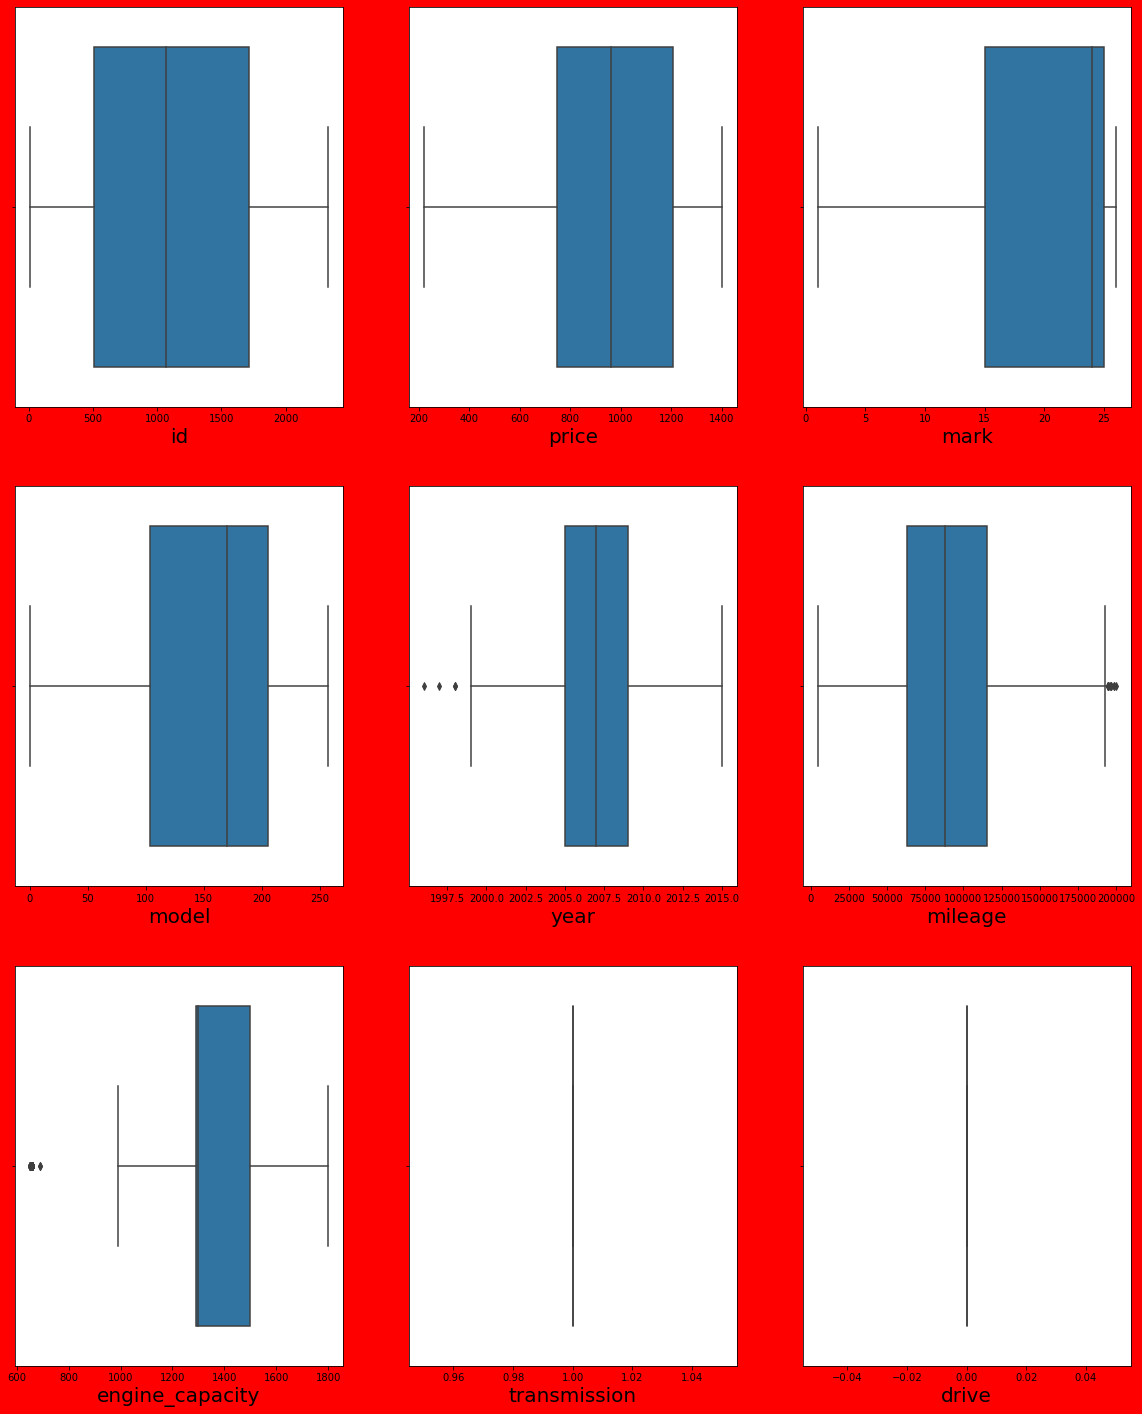

In [91]:
plt.figure(figsize=(20,25) , facecolor = 'red')
graph = 1

for column in df:
    
    if graph <= 9:
        plt.subplot (3,3,graph)
        ax = sns.boxplot(df[column])
        plt.xlabel(column , fontsize = 20)
        
    graph += 1
    
plt.show()

### Finding best random state

In [80]:
#Best Random State
MaxAccu=0
MaxRS=0

for i in range (0,11):
    X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=i)
    regression=LinearRegression()
    regression.fit(X_train,y_train)
    
    pred=regression.predict(X_train)
    training=regression.score(X_train,y_train)
    print ('Training Score' , training*100 , 'RandomState' ,i)
    
    y_pred=regression.predict(X_test)
    testing=regression.score(X_test,y_test)
    print ('Testing Score' , testing*100 , 'RandomState' ,i)
    print('\n')
    
    
    if testing>MaxAccu:
        MaxAccu=testing
        MaxRS=i
        print('MAXINING TESTING SCORE' , MaxAccu*100 , 'ON RANDOM STATE OF' , i)

Training Score 99.46113668658447 RandomState 0
Testing Score 99.3531052796209 RandomState 0


MAXINING TESTING SCORE 99.3531052796209 ON RANDOM STATE OF 0
Training Score 99.46002127332311 RandomState 1
Testing Score 99.35275275470705 RandomState 1


Training Score 99.40365055203773 RandomState 2
Testing Score 99.53122059288508 RandomState 2


MAXINING TESTING SCORE 99.53122059288508 ON RANDOM STATE OF 2
Training Score 99.40671692139641 RandomState 3
Testing Score 99.52384146470695 RandomState 3


Training Score 99.39491451994982 RandomState 4
Testing Score 99.55517610329416 RandomState 4


MAXINING TESTING SCORE 99.55517610329416 ON RANDOM STATE OF 4
Training Score 99.49253234074217 RandomState 5
Testing Score 99.26922204761432 RandomState 5


Training Score 99.46453264842738 RandomState 6
Testing Score 99.34372854932346 RandomState 6


Training Score 99.42180782975902 RandomState 7
Testing Score 99.47307191942488 RandomState 7


Training Score 99.38403335908332 RandomState 8
Testing S

In [81]:
print('Best Accuracy is ' , MaxAccu , 'On Random State' , MaxRS)

Best Accuracy is  0.9960255284350438 On Random State 8


In [82]:
#splliting our data into train test split and randomstate 6
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=8)

In [83]:
#Training the data on Linear Regression Model
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [84]:
#training score
regression.score(X_train,y_train)  

0.9938403335908332

In [85]:
#testing score
regression.score(X_test,y_test)      

0.9960255284350438

## ## Model Score
* Training Score = 99.38403335908332 %
* Testing Score = 99.60255284350438 %

In [88]:
y_pred=regression.predict(X_test)
y_pred

array([1014.74607595,  476.76678325,  729.69142874,  473.88252586,
       1329.83222415,  974.8884827 ,  931.99181248, 1346.03905384,
        782.7229767 , 1311.21471404, 1327.47826019,  766.95613443,
        747.38879708,  876.06482361, 1131.26520081,  466.1849808 ,
        735.89339229,  697.61681928, 1033.63798713, 1172.86312809,
       1367.85651313, 1329.64465631, 1309.30821801,  569.74669617,
       1293.47325547, 1369.34889145,  665.64905284, 1073.36442803,
        647.48422492, 1117.99215397,  553.1141717 ,  689.77557891,
       1155.11727684, 1317.46973713,  619.01151933, 1114.65381643,
       1080.232525  , 1360.41367625, 1240.57542108, 1234.08952368,
       1374.92226599,  623.89397665,  972.10424998,  499.0765553 ,
        942.99281311,  885.03544084,  778.85355414, 1253.4091688 ,
        574.10444094, 1295.17562023, 1179.52596567, 1217.85209642,
       1038.05006936,  909.26941717,  714.4365588 , 1076.70334062,
       1226.30329558,  794.61945174,  880.49938514,  498.77776

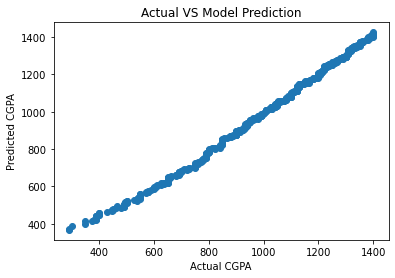

In [89]:
# how our pred vs actual look like in graph 
plt.scatter(y_test , y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual VS Model Prediction')
plt.show()

### Checking MAE , MSE & RMSE scores

In [92]:
#error in terms of numbers
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [93]:
# again predict 
y_pred = regression.predict(X_test)

In [94]:
#MAE
mean_absolute_error(y_test,y_pred)

12.957548069176422

In [95]:
#MSE
mean_squared_error(y_test,y_pred)

304.2090878852166

In [96]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

17.441590749848956

## Scores
* MAE SCORE = 12.957548069176422
* MSE SCORE = 304.2090878852166
* RMSE SCORE = 17.441590749848956

## LASSO MODEL

In [97]:
#import library
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [98]:
##### LASSO MODEL######

lasscv = LassoCV(alphas = None , max_iter = 100, normalize = True)

lasscv.fit(X_train , y_train)

LassoCV(max_iter=100, normalize=True)

In [99]:
# best aplha parameter
alpha = lasscv.alpha_
alpha

0.009913248793145224

In [100]:
# now we have best parametr noe train according to it
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.009913248793145224)

In [101]:
# now check r2 score
lasso_reg.score(X_test,y_test)

0.9960269897440347

## Ridge Model

In [102]:
############ RIDGE MODEL#########

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
ridgecv.fit(X_train , y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [103]:
# best aplha parameter
alpha = ridgecv.alpha_
alpha

0.001

In [104]:
# now we have best parametr noe train according to it
ridge_reg = Ridge(alpha)
ridge_reg.fit (X_train,y_train)

Ridge(alpha=0.001)

In [105]:
# now check r2 score
ridge_reg.score(X_test,y_test)

0.9960255407043732

##  SCORES
* LASSO SCORES = 99.60269897440347 %
* RIDGE SCORES = 99.60255407043732 %

## Cross-Validation

In [90]:
#Cross Vaildation
training=regression.score(X_train,y_train)
testing=regression.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(regression,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is 0.8505503277428249 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 3 the cv score is 0.891996035294515 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 4 the cv score is 0.8667724863232789 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 5 the cv score is 0.8053338268474246 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 6 the cv score is 0.7782217777446486 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 7 the cv score is 0.7542142680809015 and the R2 score for Training is 0.9938403335908332 and R2 score for the Testing is0.9960255284350438


At cross fold 8 the cv score is 0.7146527972268144 and the R2 score for

###  Cross-Validation Score
* Training Score = 99.38403335908332 %
* Testing Score = 99.60255284350438 %

# ADA BOOST MODEL

In [106]:
# IMPORT LIBRARY 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV  #GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Training the model

In [107]:
#splliting our data into train test split and randomstate 8
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=8)

In [108]:
# adaboost inilize
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [109]:
 # model prediction on training dataset
y_pred = ada.predict(X_train)

In [110]:
accuracy = metrics.r2_score (y_train , y_pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9945215848890392


In [111]:
# model prediction on testing datadet
pred = ada.predict(X_test)

In [112]:
accuracy = metrics.r2_score(y_test,pred)
print ('R Squared Score : ' , accuracy)

R Squared Score :  0.9939961826428734


##  Model Scores
* Training Score = 99.45215848890392 %
* testing Score = 99.39961826428734 %

## Hyperparameter Tuning for Ada Boost

In [113]:
### HYPERPARAMETER TUNING ###
from sklearn.model_selection import RandomizedSearchCV

In [114]:
params = {'n_estimators': [45,47,53,55,60,70] , 
          'learning_rate':[0.25,0.30,0.40]}

In [115]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor() , cv=5 , param_distributions=params , n_jobs=-1)

In [116]:
rnd_srch.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [45, 47, 53, 55, 60,
                                                         70]})

In [117]:
rnd_srch.best_params_

{'n_estimators': 55, 'learning_rate': 0.4}

In [118]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=55)

In [119]:
ada = AdaBoostRegressor(learning_rate=0.4, n_estimators=53)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

print ('=== Testing Score ===')
print (metrics.r2_score(y_test,y_pred))

=== Accuracy Score ===
0.9949111514865543


### Model Score after Hyperparameter Tuning
* Testing Score = 99.49111514865543 %

## Cross Validation for Ada Boost

In [120]:
#Cross Vaildation
training=ada.score(X_train,y_train)
testing=ada.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ada,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -3.6672537015536655 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 3 the cv score is -3.2574837781438544 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 4 the cv score is -3.199621368311393 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 5 the cv score is -3.913226141336348 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 6 the cv score is -5.012949220276323 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 7 the cv score is -4.5067311774773415 and the R2 score for Training is 0.9953528537247751 and R2 score for the Testing is0.9949111514865543


At cross fold 8 the cv score is -5.541642549574842 and the R2 score

##  Cross Validation score
* Training score = 99.5352853724775 %
* Testing Score = 99.49111514865543 %

# RandomForestRegressor

In [122]:
#import necessary library

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Training the Model

In [149]:
#Training the data on Linear Regression Model
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=8)
regression=RandomForestRegressor()
regression.fit(X_train,y_train)

RandomForestRegressor()

In [150]:
#training score
regression.score(X_train,y_train)  

0.9999863472828832

In [151]:
#testing score
regression.score(X_test,y_test)    

0.9999753854058582

## Model Score
* Training Score = 99.99863472828832 %
* Testing Score = 99.99753854058582 %

## Hyperparameter tuning for Random Forest

In [152]:
# RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [153]:
# define parameters
parameters={'criterion':['mse','mae','poisson'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[1,11],
           'max_depth':[1,15],
           'min_samples_leaf':[1,7]}

In [154]:
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [1, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 7],
                         'min_samples_split': [1, 11]})

In [155]:
#print best parameters
print(clf.best_params_)

{'criterion': 'poisson', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 11}


In [159]:
#reassign best parameters
rf=RandomForestRegressor(criterion= 'poisson', max_depth= 15, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 11)
rf.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=15, max_features='auto',
                      min_samples_split=11)

In [160]:
print ('Training R2 Score: ' ,rf.score(X_train,y_train)*100)

Training R2 Score:  99.99011849982644


In [161]:
pred_decision=rf.predict(X_test)

In [162]:
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 99.99699231370953


### Model Score after Hyperparameter Tuning
* Training Score = 99.99011849982644 %
* Testing Score = 99.99699231370953 %

### Cross - Validation for Random Forest

In [163]:
#Cross Vaildation
training=rf.score(X_train,y_train)
testing=rf.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rf,X,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -2.7543541898151895 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 3 the cv score is -1.8008263224708656 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 4 the cv score is -1.3222410381487772 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 5 the cv score is -1.1766262062843158 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 6 the cv score is -0.9340255781551062 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 7 the cv score is -0.5900468575585398 and the R2 score for Training is 0.9999011849982644 and R2 score for the Testing is0.9999699231370952


At cross fold 8 the cv score is -0.4981737475766018 and the R2 s

## Cross Validation score
* Training score = 99.99011849982644 %
* Testing Score = 99.99699231370952 %

# KNN MODEL

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [165]:
# define parameters
parameterss={'algorithm':['kd_tree' , 'brute'],
           'leaf_size':[3,5,10,15,30],
           'n_neighbors':[3,15,7,50,20]}

In [166]:
knn=KNeighborsRegressor()
clf=clf=GridSearchCV(knn,parameterss)
clf.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 10, 15, 30],
                         'n_neighbors': [3, 15, 7, 50, 20]})

In [167]:
#print best parameters
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}


In [168]:
#reassign best parameters
knn=KNeighborsRegressor(algorithm= 'kd_tree', leaf_size= 3, n_neighbors= 3)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [169]:
print ('Training R2 Score: ' ,knn.score(X_train,y_train)*100)

Training R2 Score:  91.18690353303374


In [170]:
pred_decision=knn.predict(X_test)

In [171]:
from sklearn.metrics import r2_score
rfs = r2_score(y_test,pred_decision)
print('Testing R2 Score:' , rfs*100)

Testing R2 Score: 81.72957848219954


###  Model Score after Hyperparameter Tuning
* Training Score = 91.18690353303374 %
* Testing Score = 81.72957848219954 %

## Cross-Validation for KNN

In [172]:
#Cross Vaildation
training=knn.score(X_train,y_train)
testing=knn.score(X_test,y_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(knn,X_new,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and the R2 score for Training is {training} and R2 score for the Testing is{testing}')
    print('\n')

At cross fold 2 the cv score is -4.335297666050584 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 3 the cv score is -3.9791440133620806 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 4 the cv score is -4.52333795675844 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 5 the cv score is -5.806877021871371 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 6 the cv score is -7.030067830688206 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 7 the cv score is -7.032554264575304 and the R2 score for Training is 0.9118690353303375 and R2 score for the Testing is0.8172957848219955


At cross fold 8 the cv score is -8.14374824439301 and the R2 score for

##  Cross Validation score
* Training score = 91.18690353303375 %
* Testing Score = 81.72957848219955 %